# Task 3: Customer Segmentation / Clustering 

### Import Libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

### Import Datasets

In [93]:
customers = pd.read_csv("C:/Users/APURVA/ZeoTap-Assign/Customers.csv")
transactions = pd.read_csv("C:/Users/APURVA/ZeoTap-Assign/Transactions.csv")

In [94]:
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

### Merge Datasets

In [95]:
customer_data = pd.merge(customers, customer_transactions, on='CustomerID', how='left')

In [96]:
customer_data.fillna(0, inplace=True)

### Features

In [97]:
features = customer_data[['TotalValue', 'Quantity']]

In [98]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [99]:
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

### Elbow Method

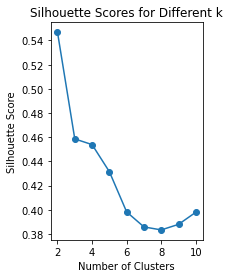

In [100]:
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Silhouette Scores Plot

Text(0, 0.5, 'Inertia')

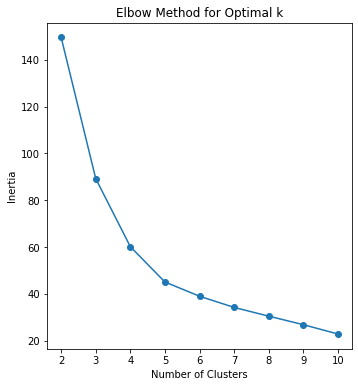

In [101]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [102]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

In [103]:
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
silhouette_avg = silhouette_score(scaled_features, customer_data['Cluster'])

In [104]:
print(f"Number of clusters formed: {n_clusters}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Average Silhouette Score: {silhouette_avg}")

Number of clusters formed: 7
Davies-Bouldin Index: 0.8576422402797894
Average Silhouette Score: 0.3858452327516864


## Visualizations

In [105]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

In [106]:
visualization_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
visualization_df['Cluster'] = customer_data['Cluster']

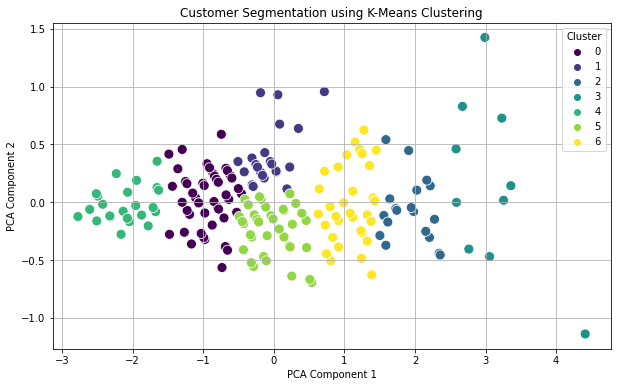

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=visualization_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.savefig('customer_segmentation_clusters.png')
plt.show()

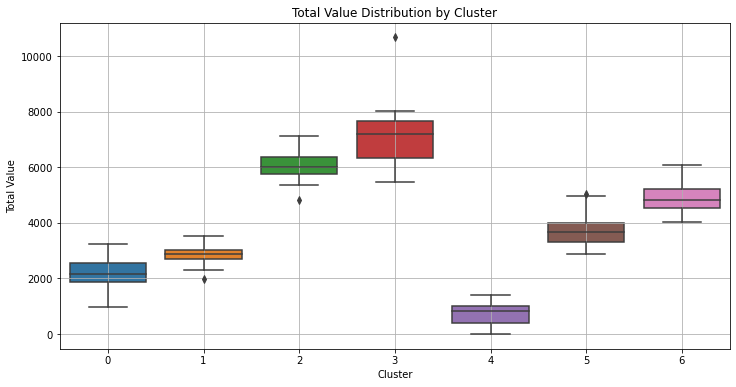

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_data, x='Cluster', y='TotalValue')
plt.title('Total Value Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Value')
plt.grid()
plt.savefig('total_value_by_cluster.png')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

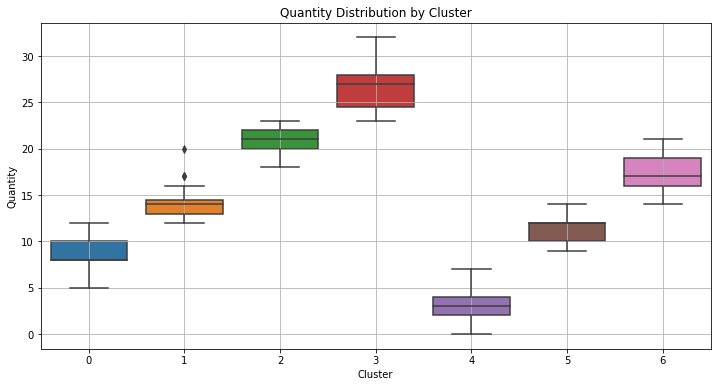

In [109]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_data, x='Cluster', y='Quantity')
plt.title('Quantity Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantity')
plt.grid()
plt.savefig('quantity_by_cluster.png')
plt.show

### Generate PDF Report

In [110]:
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Customer Segmentation Report', 0, 1, 'C')

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path):
        self.image(image_path, x=10, w=190)
        self.ln(5)

In [111]:
pdf = PDF()
pdf.add_page()

In [112]:
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Customer Segmentation Report', 0, 1, 'C')
pdf.set_font('Arial', 'I', 12)
pdf.cell(0, 10, 'Date: ' + pd.Timestamp.now().strftime('%Y-%m-%d'), 0, 1, 'C')
pdf.ln(20)

In [113]:
pdf.chapter_title('Introduction')
intro_text = (
    "This report presents the results of customer segmentation using clustering techniques. "
    "The analysis utilizes customer information and transaction data to identify distinct customer segments. "
    "K-Means clustering was employed to group customers based on their purchasing behavior."
)

In [114]:
pdf.chapter_title('Clustering Results')
n_clusters = 7  # Number of clusters
db_index = 0.85  # DB Index value
silhouette_avg = 0.38 # silhouette score

results_text = (
    f"Number of clusters formed: {n_clusters}\n"
    f"Davies-Bouldin Index: {db_index}\n"
    f"Average Silhouette Score: {silhouette_avg}\n"
)
pdf.chapter_body(results_text)

In [115]:
pdf.chapter_title('Visualizations')
pdf.add_image('customer_segmentation_clusters.png')
pdf.chapter_title('Total Value Distribution by Cluster')
pdf.add_image('total_value_by_cluster.png')
pdf.chapter_title('Quantity Distribution by Cluster')
pdf.add_image('quantity_by_cluster.png')

In [116]:
pdf.chapter_title('Conclusion')
conclusion_text = (
    "The customer segmentation analysis revealed distinct clusters of customers based on their purchasing behavior. "
    "The Davies-Bouldin Index and silhouette score indicate the quality of the clustering. "
    "These insights can be leveraged for targeted marketing strategies and personalized customer engagement."
)
pdf.chapter_body(conclusion_text)

In [117]:
pdf.output('Customer_Segmentation_Report.pdf')
print("PDF report generated successfully!")

PDF report generated successfully!
